In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import os
import sklearn
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score


Models that were too computationally expensive (would not complete after over an hour): KNN Regression, LinearSVC, SVM with rbf, poly, and sigmoid kernels, elasticnet

The best models based on cross validation scores are Linear Regression, Ridge Regression, and Lasso Regression. Based on the lowest RMSE for test and train data, the best model is Ridge Regression:

train rmse: 30.038931283543285
test rmse: 31.162162308556404

In [21]:
os.chdir('C:\\Users\\Zoidb\\Downloads')

In [22]:
data = pd.read_csv('Patent.csv')

data.head()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,...,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,...,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,...,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,...,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,...,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


In [23]:
data.drop(columns=['lag_y'],inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 24 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(14)
memory usage: 12.0 MB


In [25]:
data.head(5)

,pat,fwd,lag_d,noc,gy,ay,noi,UMC,firm,MSA,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,6,2000,1997,3,711,596125,156,...,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,22,2000,1997,1,711,755619,261,...,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,22,2000,1995,3,712,357270,32,...,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,13,2000,1997,2,712,551495,261,...,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,9,2000,1997,3,712,252865,553,...,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


In [26]:
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

pat [6052760 6052764 6052773 6052775 6052776 6052777 6052778 6052780 6052781
 6052782 6052784 6052785 6052786 6052795 6052796 6052801 6052802 6052803
 6052819 6052670] 

fwd [35  6 66 14  7  5 39  3  9 83 12 10 18 41 23  4  2 17 20 52] 

lag_d [ 895  851 1778 1028  915 1191 1020 1152 1036  917  879  840 1267 1023
 1805  839  935 1103  963  991] 

noc [ 6 22 13  9 14 35 24 19 25 12 26 17 47 10 64 46 34 36  7 18] 

gy [2000 2004 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982] 

ay [1997 1995 1996 1994 1993 1991 1992 1990 1988 1986 1989 1987 1983 1985
 1982 1984 1981 1980 1979] 

noi [ 3  1  2  5  4  7  9  8  6 10 13 11 14 26 12 17 20 16 18 23] 

UMC [711 712 713 726 714 705 706 707 708 718 709 725 381 382 386 715 716 703
 717 340] 

firm [596125 755619 357270 551495 252865 280070 767124 767125 373440 278220
 211480 361691 641805 499570 728129 767117 512710 746763 706518 279275] 

MSA [156 261  32 553  16  31 240  52 168  13 202 538 243 268 537 

In [27]:
#Removing ID and the target variable fwd from data lists and then putting variables into appropriate lists
discrete = [var for var in data.columns if var in ['lag_d','noc','noi','tbm','npr','fpr','FS','PAG']]
categorical = [var for var in data.columns if var in [ 'gy','ay','firm','UMC','MSA','FT']]
continuous = [var for var in data.columns if var not in discrete and var not in categorical and var not in ['fwd','pat']]


print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 8 discrete variables
There are 8 continuous variables
There are 6 categorical variables


In [28]:
discrete

['lag_d', 'noc', 'noi', 'tbm', 'PAG', 'npr', 'fpr', 'FS']

In [29]:
continuous

['tbru', 'Cent', 'EXP_Y', 'DT', 'IT', 'RT', '3rd_PT', 'Rnd_Int']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['pat','fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((52428, 22), (13107, 22))

In [31]:
#finding percent of missing values
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

FS 0.40782787823300526


In [32]:
def distribution_plots(df, variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

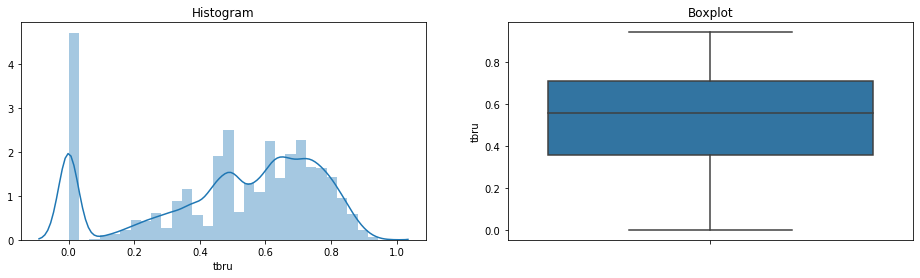

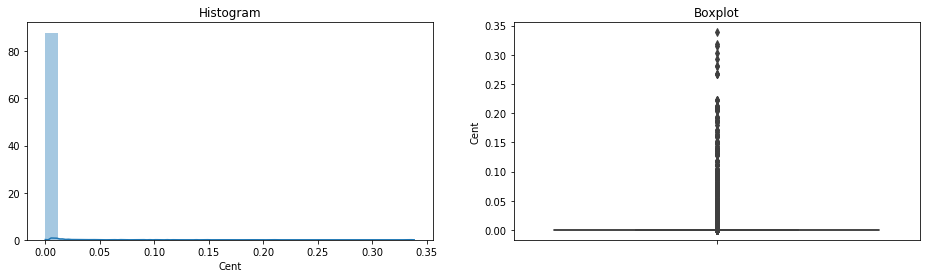

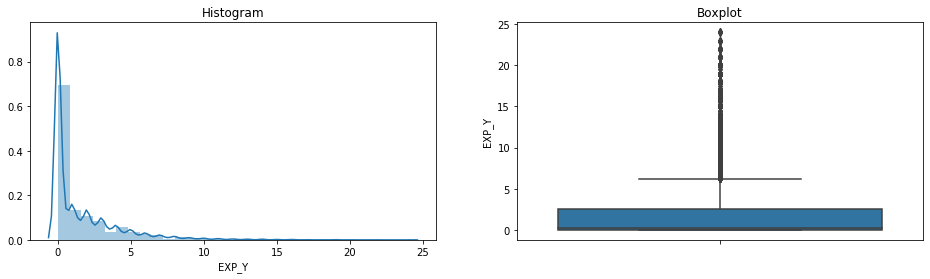

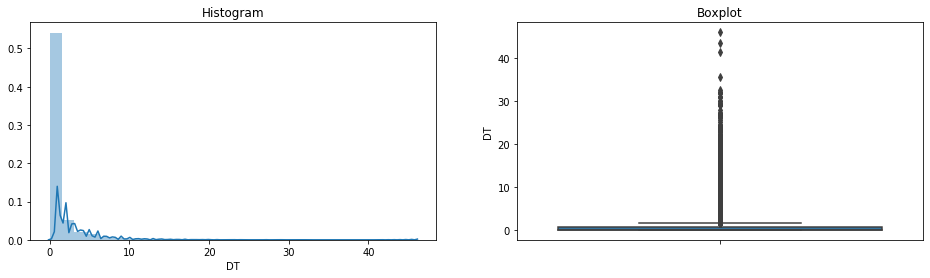

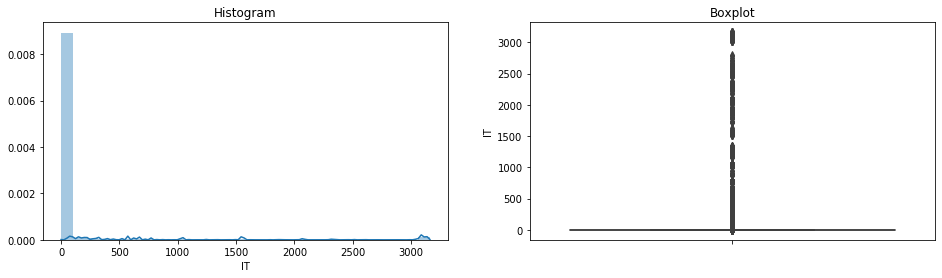

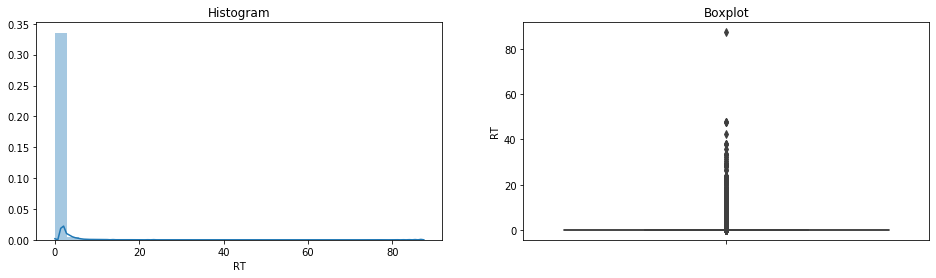

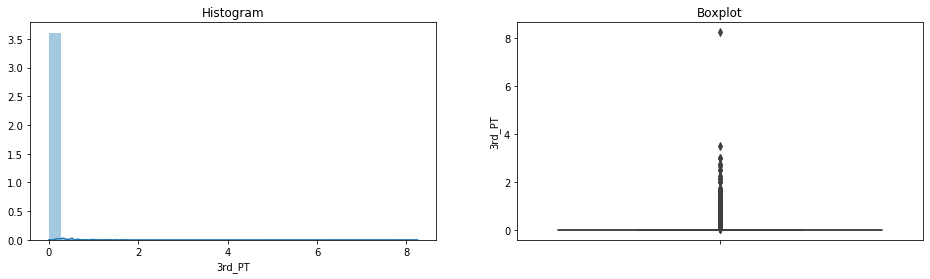

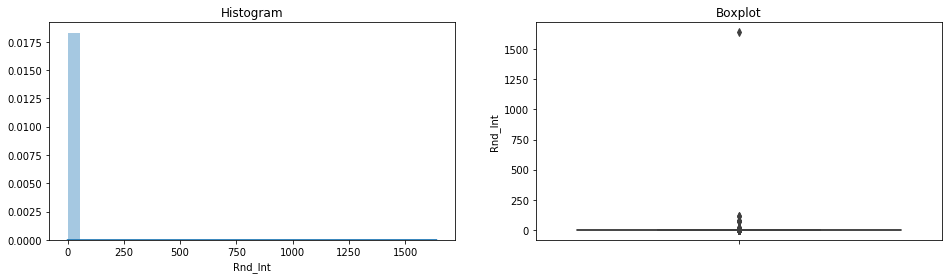

In [33]:
for var in continuous:
    distribution_plots(data, var)

Most continuous variables are incredibly right skewed with a lot of outliers. I will deal with some outliers by scaling the data, while for a select few I will use a Yeo Johnson transformer to get more normal distributions (I use Yeo Johnson because it is a transformer that can deal with 0 values that are present throughout the dataset.

I elected to not perform any discretization because it did not seem to improve the accuracy of the models (tried Kbinsdiscretizer, Equal Width and Equal Frequency)

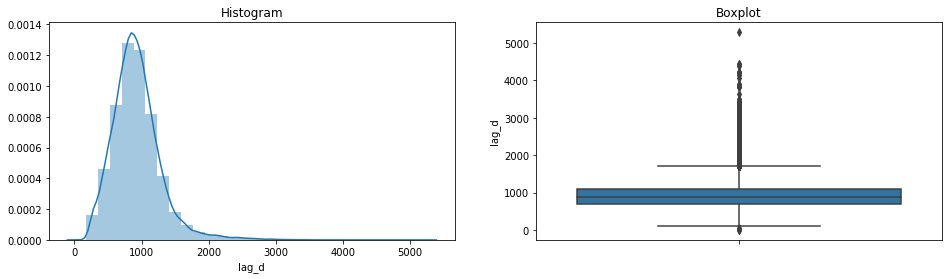

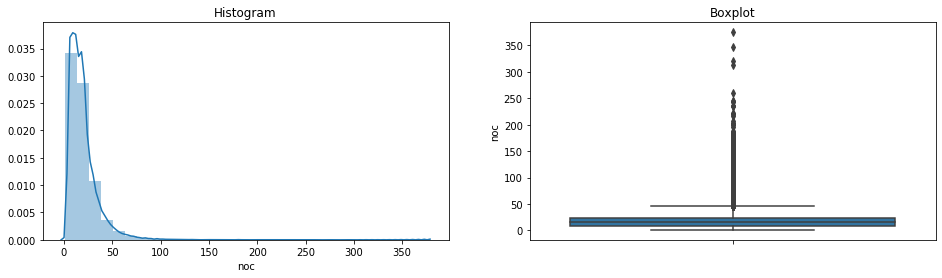

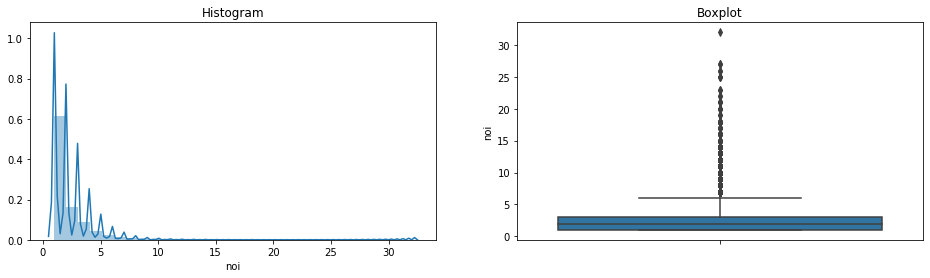

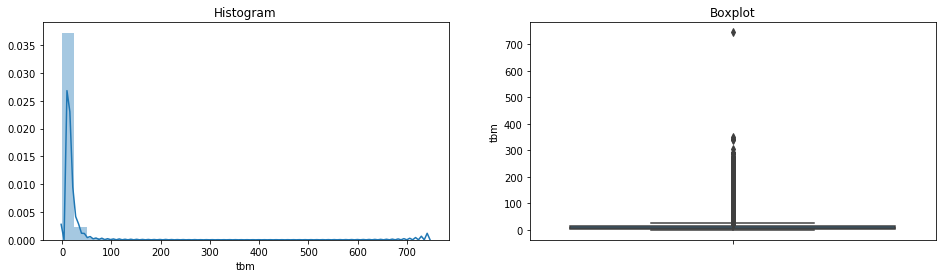

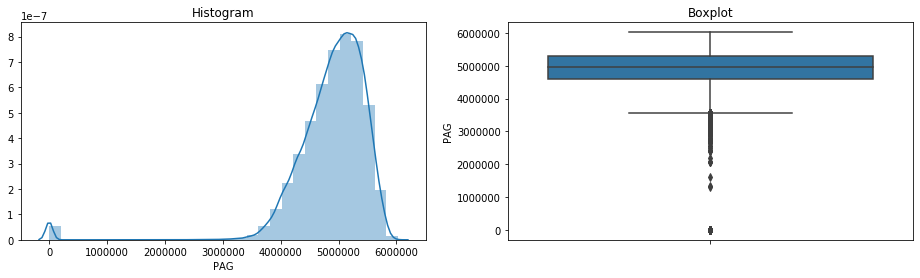

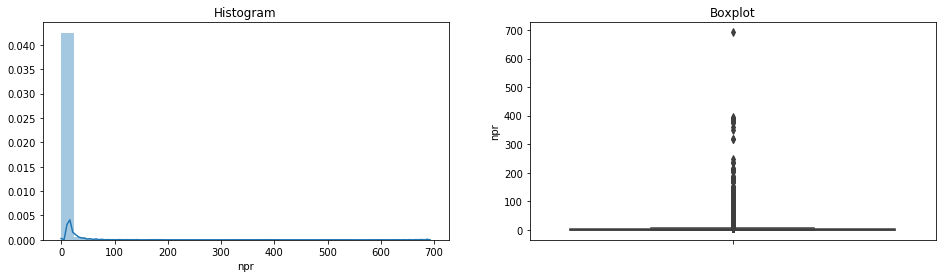

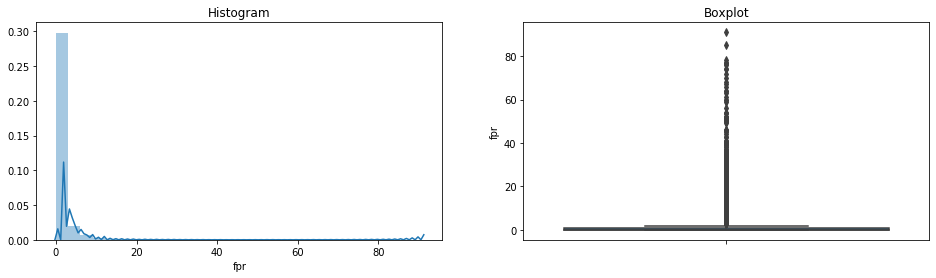

C:\Users\Zoidb\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Zoidb\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Zoidb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Zoidb\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


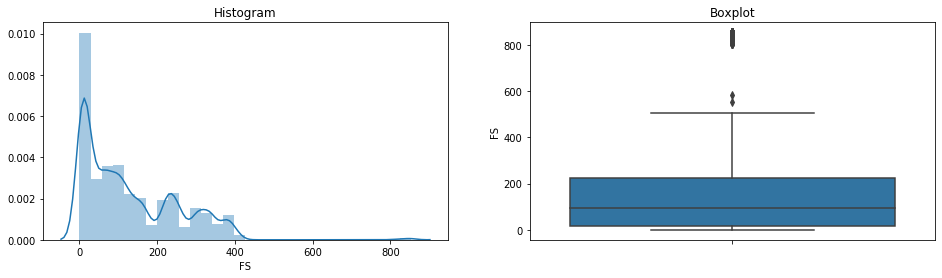

In [34]:
#seeing distributions of discrete variable

for var in discrete:
    distribution_plots(data, var)


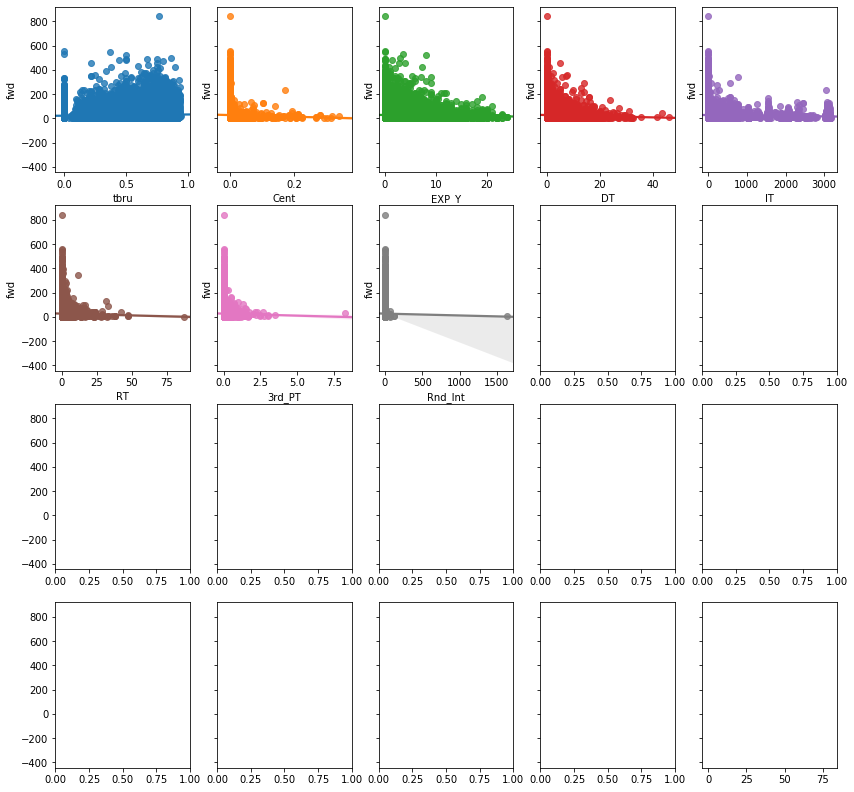

In [35]:
#Identifying linear relationships for continuous variables

fig, axs = plt.subplots(ncols=5, nrows=4,sharey=True,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous):
    if var != "fwd":
        sns.regplot(x=var, y="fwd", data=data, ax=axs[i]);

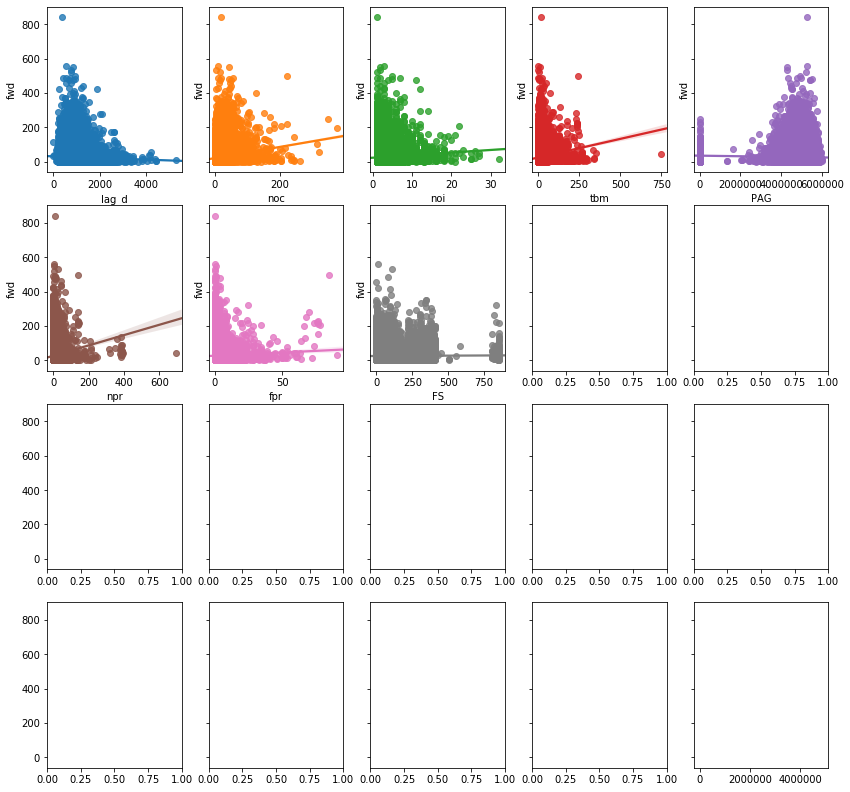

In [36]:
#Identifying linear relationships for discrete variables

fig, axs = plt.subplots(ncols=5, nrows=4,sharey=True,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(discrete):
    if var != "fwd":
        sns.regplot(x=var, y="fwd", data=data, ax=axs[i]);

In [ ]:
data.FS

In [ ]:
np.isnan(X_train['FS'])

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine.variable_transformers import LogTransformer
from feature_engine import categorical_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce

categorical=['gy','ay','firm','UMC','MSA','FT']

X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')


from sklearn.preprocessing import StandardScaler

from feature_engine import variable_transformers as vt



patent_pipe = Pipeline([
    ('imputer_num', mdi.EndTailImputer(distribution='gaussian',
tail='right',
fold=2,
variables=['FS'])),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    ('yt_transform', vt.YeoJohnsonTransformer(variables = ['tbm','npr','PAG','lag_d'])),
    ('Standard', StandardScaler()),
    
     
])

In [19]:
patent_pipe.fit(X_train, y_train)
patent_pipe.fit(X_test,y_test)



Pipeline(memory=None,
         steps=[('imputer_num',
                 EndTailImputer(distribution='gaussian', fold=2, tail='right',
                                variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'ay', 'firm', 'UMC',
                                                     'MSA', 'FT'])),
                ('yt_transform',
                 YeoJohnsonTransformer(variables=['tbm', 'npr', 'PAG',
                                                  'lag_d'])),
                ('Standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=

In [20]:
X_train=patent_pipe.transform(X_train)
X_test=patent_pipe.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)


# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
# Print Co-efficients

# Check test data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))
print("LR Performance Test: ", lr.score(X_test,y_test))


X_train_preds = lr.predict(X_train)
X_test_preds = lr.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))



Mean Cross-validation scores: [0.1762303  0.18036231 0.1707447  0.15951307 0.16571957]
LR Performance Train:  0.17542241808369707
LR Performance Test:  0.1733306263826423
train rmse: 30.038812305016048
test rmse: 31.162254232413677


In [33]:
#Was unable to complete after over an hour even after cv=2

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


pipe_knn=Pipeline([ 
    ('knnreg', KNeighborsRegressor())
    
])

#param_knn = {'n_neighbors': [5, 10, 15, 20]}
param_knn = {'knnreg__n_neighbors': range(1,10)}

#apply grid search
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=2, return_train_score=True, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))


#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

X_train_preds = grid_knn.predict(X_train)
X_test_preds = grid_knn.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

KeyboardInterrupt: 

In [46]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

reg_sgd_pipe = Pipeline([

    ('sgd_reg', SGDRegressor(max_iter=10000, tol = .000001))
])

param_sgd = {'sgd_reg__eta0': [.001, .01, .1, .5, 1, 10, 100, 1000], 'sgd_reg__penalty' :['l1','l2'],'sgd_reg__alpha' :[0.1,0.01,0.001, .00001, .000001] }
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd, cv=5, n_jobs = -1, return_train_score = True)


grid_sgd.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sgd_reg',
                                        SGDRegressor(alpha=0.0001,
                                                     average=False,
                                                     early_stopping=False,
                                                     epsilon=0.1, eta0=0.01,
                                                     fit_intercept=True,
                                                     l1_ratio=0.15,
                                                     learning_rate='invscaling',
                                                     loss='squared_loss',
                                                     max_iter=10000,
                                                     n_iter_no_change=5,
                                                     penalty='l2', power_t=0.25,
                                                     random_st

In [47]:
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))
print("Best estimator:\n{}".format(grid_sgd.best_estimator_))

print('SGD train score: ', grid_sgd.score(X_train, y_train))
print('SGD test score: ', grid_sgd.score(X_test, y_test))
X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

Best parameters: {'sgd_reg__alpha': 1e-05, 'sgd_reg__eta0': 0.001, 'sgd_reg__penalty': 'l2'}
Best cross-validation score: -17658223.40
Best estimator:
Pipeline(memory=None,
         steps=[('sgd_reg',
                 SGDRegressor(alpha=1e-05, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.001, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=1e-06,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)
SGD train score:  -45.24016617866659
SGD test score:  -0.4915973875295945
train rmse: 224.94517839498224
test rmse: 41.85899039368331


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge()

#parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance


print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))
print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))

X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

Best Mean Cross-validation score: 0.17

Ridge parameters:  {'alpha': 100}
Ridge.coef_: [-2.01101879e+00  4.37511632e+00  2.63551636e+00  1.12727311e+00
  1.06144388e+00  2.39122161e+00  3.47520216e+00  1.11310985e+00
  7.63582267e-03 -3.31852196e-01 -2.03824619e-01  1.56635128e-02
 -8.50000172e-01 -2.72805092e-01 -6.35269725e-03  1.62469256e+00
  6.14713150e-01 -1.17493433e-01 -2.43767669e-01 -1.89250621e+00
 -1.02976028e+00  1.02474014e+00  1.44122185e+00  1.71155985e+00
 -1.27498195e+00 -2.28737653e-02  1.61597821e-01 -4.39647149e-01
  7.35274546e-01  3.60667479e-01  9.35175542e-01 -1.10158016e+00
  4.81035471e-01 -9.07355641e-01 -5.84694986e-01  6.40672386e-01
  1.64275180e+00 -1.50471463e+00 -4.49550471e-01 -3.07065654e+00
 -3.44429978e-01  5.02776841e-02  1.30788316e+00 -1.88372612e+00
  1.88739581e+00  2.38091342e+00  1.95192517e+00 -4.48765337e-02
  1.35761050e+00  1.62480958e+00  1.83303258e+00  1.98981014e+00
  1.54566308e+00  1.74915599e+00 -2.73363168e-01  3.33914293e-02
 -4

In [49]:
#Lasso regression 

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#parameters
param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True,n_jobs=-1)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance

print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

Best Mean Cross-validation score: 0.17

Lasso parameters:  {'alpha': 0.01}
Lasso.coef_: [-1.91459812e+00  4.37831458e+00  2.62654359e+00  1.12792446e+00
  1.05864184e+00  2.35266402e+00  3.47082341e+00  1.10039554e+00
  0.00000000e+00 -3.28976023e-01 -1.93279498e-01  0.00000000e+00
 -8.40107708e-01 -2.62690291e-01 -6.19082038e-03  1.60439717e+00
  6.22132542e-01  0.00000000e+00 -4.64817639e-01 -2.11135859e+00
 -1.27096698e+00  8.98084308e-01  1.34523179e+00  1.65214691e+00
 -9.41113277e-01  1.30141850e-01 -4.46378936e-03 -2.55287065e-01
  5.75058613e-01  4.52301283e-01  9.10521567e-01 -1.19354560e+00
  5.26311394e-01 -6.78789572e-01 -3.56112415e-01  5.43810377e-01
  1.47034506e+00 -1.50149619e+00 -4.50183095e-01 -3.02462221e+00
 -3.58150575e-01  0.00000000e+00  1.18178655e+00 -1.86367359e+00
  1.57585248e+00  2.11524095e+00  1.68582544e+00 -9.84208108e-02
  1.19774192e+00  1.43434701e+00  1.51525530e+00  1.68614657e+00
  1.32938841e+00  1.46306705e+00 -1.54050668e-01  1.61191991e-01
 -

In [50]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

#parameters
param_elasticnet = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'l1_ratio' :[0.2,0.4,0.6,0.8], 'max_iter':[10, 100, 1000, 10000], 'tol': [.000001, .00001, .0001, .001, .01, .1]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True,n_jobs=-1)
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

X_train_preds = grid_elasticnet.predict(X_train)
X_test_preds = grid_elasticnet.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

KeyboardInterrupt: 

In [ ]:
# Linear Support Vector Classifier, was not able to run to completion after over an hour
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print('train score: ', clf.score(X_train, y_train))
print('test score: ', clf.score(X_test, y_test))

X_train_preds = clf.predict(X_train)
X_test_preds = clf.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))


In [ ]:
from sklearn.svm import SVC

#Support vector machine testing rbf, poly, and sigmoid kernels, was unable to run to completion after an hour
param_grid = [{'kernel': ['rbf'],
               'C': [ 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1]},
              {'kernel': ['poly'],
               'C': [1, 10, 100],
              'gamma': [0.001, 0.01, 0.1]},
             {'kernel': ['sigmoid'],
               'C': [1, 10, 100],
             'gamma': [0.001, 0.01, 0.1]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=2,
                          return_train_score=True,scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))

X_train_preds = grid_svc_kernel.predict(X_train)
X_test_preds = grid_svc_kernel.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

C:\Users\Zoidb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:

from sklearn.svm import SVC

svc = SVC(cache_size=2000)
svc.fit(X_train, y_train)

svc_kernel = SVC(kernel = 'rbf')
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.0001,0.001,0.1,1,10]}

grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))
print()
print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))
print(grid_svc_kernel.best_params_)

In [ ]:
#Support Vector Machine with poly kernel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(cache_size = 2000)
svc.fit(X_train, y_train)

svc_kernel = SVC(kernel = 'poly')
param_svc_kernel = {'C': [1000],'gamma':[0.001]}

grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=-1)
grid_svc_kernel.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))
print()
print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))
print(grid_svc_kernel.best_params_)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(cache_size=2000)
svc.fit(X_train, y_train)

svc_kernel = SVC(kernel = 'sigmoid')
param_svc_kernel = {'C': [100,1000,10000],'gamma':[0.0001,0.001,0.1,]}

grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=-1)
grid_svc_kernel.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))
print()
print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))
print(grid_svc_kernel.best_params_)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeRegressor()
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,5,1),
           "max_leaf_nodes": range(2,10)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5,n_jobs=-1)
grid_tree.fit(X_train,y_train)

print(grid_tree.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_tree.best_score_))
print()

print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))

X_train_preds = grid_tree.predict(X_train)
X_test_preds = grid_tree.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

{'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_split': 2}
Best Mean Cross-validation score: 0.07

Accuracy on training set: 0.080
Accuracy on test set: 0.068
train rmse: 31.726528488643613
test rmse: 33.09119481586178


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

pipe_polynom=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('norm_reg', LinearRegression())
    
])

param_polynom = {'polynomialfeatures__degree':range(1,3)}
grid_poly = GridSearchCV(pipe_polynom, param_polynom,cv=3, n_jobs=-1, return_train_score = True)


grid_poly.fit(X_train, y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

#find best parameters
print('Poly Reg parameters: ', grid_poly.best_params_)

# Check test data set performance

print("Poly Train Performance: ", grid_poly.score(X_train,y_train))
print("Poly Test Performance: ", grid_poly.score(X_test,y_test))

X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))


Best Mean Cross-validation score: 0.17

Poly Reg parameters:  {'polynomialfeatures__degree': 1}
Poly Train Performance:  0.17542490512285724
Poly Test Performance:  0.17331646601910244
train rmse: 30.03876700439152
test rmse: 31.162521126877824


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import Ridge


pipe_polynom=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('norm_reg', LinearRegression())
    
])

param_polynom = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]
grid_poly = GridSearchCV(pipe_polynom, param_polynom,cv=3, n_jobs=-1, return_train_score = True)


grid_poly.fit(X_train, y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

#find best parameters
print('Poly Reg parameters: ', grid_poly.best_params_)

# Check test data set performance

print("Poly Train Performance: ", grid_poly.score(X_train,y_train))
print("Poly Test Performance: ", grid_poly.score(X_test,y_test))

X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))


Best Mean Cross-validation score: nan

Poly Reg parameters:  {'norm_reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
Poly Train Performance:  0.3486229149201494
Poly Test Performance:  -12134292499.856705
train rmse: 26.698276946587523
test rmse: 3775462.596154956
